# Exploratory programming meets blogging

> Write and publish blog posts others can reproduce in Google Colab!

- toc: false
- badges: true
- categories: [nbdev, fastpages, jupyter]
- description: Write and publish blog posts others can reproduce in Google Colab!
- author: Nate Gadzhibalaev

This is my first article in several years, and it's about software engineering and not marketing, so I'm a bit overenthusiastic. Here's why!
- I wrote this in a Jupyter Notebook that you can access on Github!
- You can also run this article in Colab in one click. Not that there's much to run yet.
- The blog also has a CI based on Github Actions that verifies that each article actually runs correctly when I commit it. 

> Note: This has been written a few weeks ago, and after I wrote the initial article, [@hamelhusain](https://twitter.com/hamelhusain) added a bunch of new features to the platform. I'll keep the initial article in place, and highlight what new features Hamel implemented.

[`fast_template`](https://github.com/fastai/fast_template) is a minimal blogging platform built on top of Github that folks can use to write and publish posts without any local dev environment whatsoever. Then, [@hamelhusain](https://twitter.com/hamelhusain) added Jupyter Notebooks support before I got to do it, I've implemented a few additions, and Jeremy Howard suggested we move all the advanced stuff from `fast_template` to a new repo — that's how [`fastpages`](https://github.com/fastai/fastpages) got to be.



There are several great examples of fast_template blogs out there already — just look at this — [GPT 2 Annotated](https://amaarora.github.io/2020/02/18/annotatedGPT2.html). One thing that is still in early development, and not everyone is onboard, is that *each fastpages-based blog is essentially a nbdev project*, meaning you can write and build code into a python library, share code between articles, publish it on pypi if you'd want to.

### Starting a blog with `fast_template`

> Note: **Upd: fast_template is the most basic blogging platform imaginable, all the advanced features migrated to `fastpages` instead.**

So, fast_template is basically a Jekyll blog with a few handy things on top of it: 
- It's put together around an idea of hosting it on Github Pages, so you don't have to think about picking a VM, configuring your deployment, monitoring. [Essentially this removes the tech entry barrier (if there was one) to blogging with Jekyll.](https://www.fast.ai/2020/01/20/blog_overview/)
- It simplifies working with images, so you get decent pics size and DPI out of the box.
- As of right now, it supports using MS Word (sic), or Jupyter Notebooks as editor environment, and then exporting your posts into Jekyll posts _automatically_. You just push stuff to Github, and a Github Action takes care of the rest.


### How does jupyter to blog conversion work?

Internally, it uses `nbdev.export2html()` to preprocess and then export notebooks into html files, stores them in `_posts`, and then Jekyll picks them up from there. This whole thing is wrapped in a rather scary github action that grabs your repository, generates posts, processes them with Jekyll, and pushes everything back to your repo, to `gh-pages` branch. If you would want to use, say, Netlify instead, you'd just edit this last part where it pushes the code to github, and hit a Netlify hook instead. 

### Running the blog locally

If [this PR gets merged](https://github.com/fastai/fastpages/pull/106), you'll just `docker-compose up`. This will spin up Jupyter Notebook, a watcher that processes your notebooks to posts, and a Jekyll server. 

### Adding links to Github and Google Colab

> Note: There's even easier way to do this now with a front matter key `badges:true` that adds badges to the article heading.  

See those View on Github and Run on Colab links? If you click them — you'll land on the notebook file on Github in `xnutsive/blog`, and if you click Google Colab link — it'll open Colab and load this notebook into it. Neat, right? 

To do that, you'll need to edit your post layout. `post.nb_path` has the path to the notebook, i.e. `_notebooks/YYYY-MM-DD-Title.ipynb`. With a few more settings like `site.github_user` and `site.github_repo`, you can [put the links together.](https://github.com/xnutsive/blog/blob/master/_layouts/post.html#L17)

### Making sure your posts are clear and run correctly

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Me explaining the execution order of my Jupyter notebook cells. <a href="https://t.co/dwWt5NzmUL">pic.twitter.com/dwWt5NzmUL</a></p>&mdash; Chris Albon (@chrisalbon) <a href="https://twitter.com/chrisalbon/status/1221977821310083075?ref_src=twsrc%5Etfw">January 28, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

I did two more things to make sure my posts / notebooks always run correctly, and are clean and readable. In fact, `nbdev` does both if you ask nicely: 

- You can use `nbdev_clean_nbs` to clean up metadata and cell execution orders. 
- You can `nbdev_install_git_hooks` to clean the notebooks automatically for you every time you check out or commit any changes to them!
- You can use `nbdev_test_nbs` to run all the notebooks. If any cell errors, it'll scream at you with an error message.

Nbdev git hooks have an added bonus of resolving merge conflicts in notebooks nicely, so if you see anything weird with my posts — just create a pull-request ;) 

I've added `nbdev_test_nbs` to the github action that processes my post — that way I'll know if anything's broken.

**Note: if you do anything that requires GPU compute in your posts, `nbdev_test_nbs` will likely die in the github action, so until come back in a week for a workaround.**

### Does the code part actually work?

These are just to verify that code highlighting and pyplot charts will still look alright.

In [4]:
#default_exp hello_world

In [5]:
# export
# Let's write some code and see if it runs. 

def say_hello(name: str) -> None:
    print(f"Hello, {name}!")

say_hello("Dear Reader")

Hello, Dear Reader!


Okay, what about plots?

In [3]:
#hide
!pip install matplotlib pandas

In [ ]:
%matplotlib inline

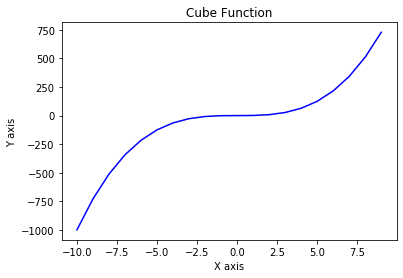

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = np.linspace(-10, 9, 20)

y = x ** 3

plt.plot(x, y, 'b')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Cube Function')
plt.show()

### Other features

Fastpages already supports comments, tags, and the official introduction post from Hamel and Jeremy are coming soon. My aim is to use the blog as a way to learn things and publish my learnings in one pass, and see where this goes. 